In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import *
import math
from funciones import approx_eigval_max,approx_eigval_min_1, componente
from funciones import lectura_graficas,normalizar,graficas_sin_normalizar,graficas_normalizadas,graficas_PCA

In [22]:
indices=lectura_graficas('Data/indices.csv')
indices.set_index("Unnamed: 0",inplace=True)

In [23]:
indices_norm=normalizar(indices)
indices_norm.head()

,DJ Utility,DJ Composite,CBOE Volatility,DJ Industrial Average,NASDAQ 100,NAQC,NYSE Composite,NYSE Market Composite,Russell 200,S&P 100,S&P 500
Unnamed: 0,,,,,,,,,,,
0,1.426150,2.131171,0.324443,1.951971,2.254554,2.141269,1.905224,2.253822,1.638886,2.328263,2.322130
1,1.255341,2.051156,0.955322,1.890997,2.130075,2.037180,1.869764,2.210024,1.651213,2.230861,2.222411
2,1.454743,2.316835,-0.163764,2.131240,2.244084,2.163581,2.116905,2.511199,1.927353,2.394551,2.398075
3,1.452360,2.326099,-0.163764,2.133535,2.223732,2.138516,2.099565,2.383412,1.917423,2.394551,2.380384
4,1.437813,2.271318,-0.074594,2.081451,2.248471,2.167014,2.062305,2.269280,1.906216,2.378994,2.367641


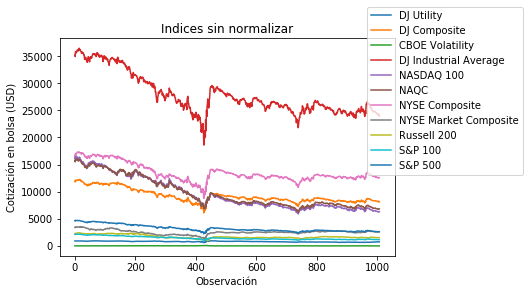

In [24]:
graficas_sin_normalizar(indices)

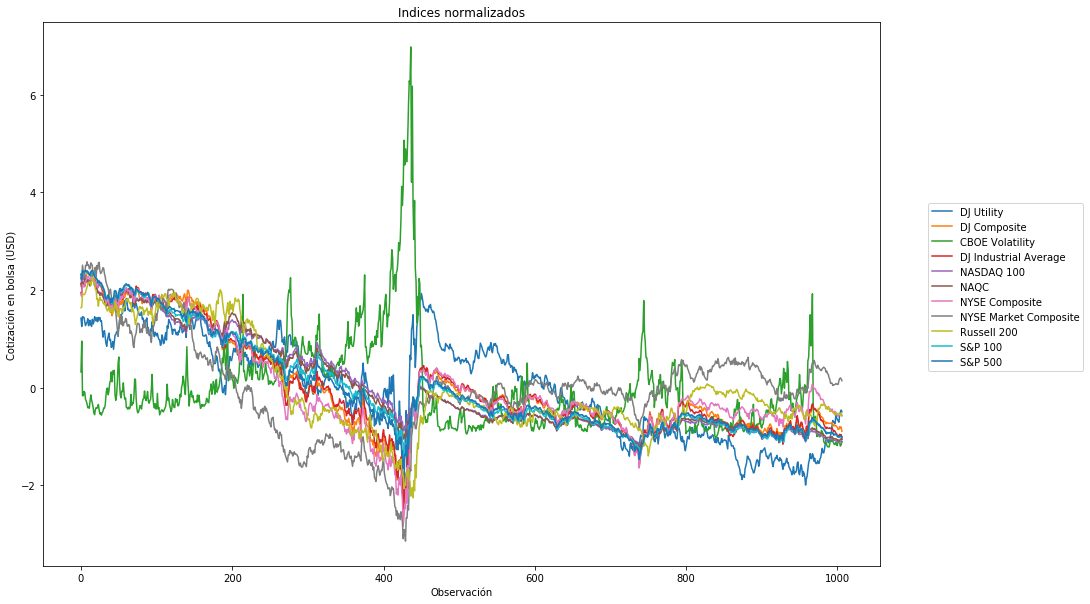

In [25]:
plt.figure(figsize=(15, 10))
graficas_normalizadas(indices_norm)

A partir de las gráficas se puede observar que el indice CBOE es el que resalta sobre los demás, teniendo un comportamiento considerable a la alza durante el periodo de 380 y 350 días aproximadamente, es decir durante el primer trimestre del año 2019. Aquí continuación una gráfica con todos los índices. 

Para poder iniciar nuestro análisis de eigenvalores y eigenvectores necesitamos calcular la matriz de covarianza.

In [26]:
sigma=np.cov(indices_norm, rowvar = False)
sigma.shape

(11, 11)

In [27]:
eig_val, eig_vec = np.linalg.eig(sigma)
eig_val

array([8.61299667e+00, 1.61944798e+00, 4.22493345e-01, 2.33921034e-01,
       6.62538193e-02, 3.12638374e-02, 6.03725326e-03, 4.46058601e-03,
       1.04913487e-04, 7.84168183e-04, 2.23639093e-03])

In [28]:
eigen_val=[]
eigen_vec=[]
eigen_val_1_2=[]
eigen_vec_1_2=[]
sigma_2=sigma
Acumulada=0
totales= []
i=0
for i in range(len(sigma_2)):
    if (i==0):
        eigen_val_1_2,eigen_vec_1_2,sigma_2=approx_eigval_max(sigma_2,100)
        eigen_val.append(eigen_val_1_2)
        eigen_vec.append(eigen_vec_1_2)
    else:
        eigen_val_1_2,eigen_vec_1_2,sigma_2=approx_eigval_min_1(sigma_2,100,eigen_val[i-1],eigen_vec[i-1])
        eigen_val.append(eigen_val_1_2)
        eigen_vec.append(eigen_vec_1_2)

In [29]:
np.array(eigen_val).sum()

11.000143041223946

In [30]:
acum,com=componente(sigma_2,np.array(eigen_val))

Utilizamos los eigenvectores que obtuvimos para multiplicar con el producto punto a los indices y así obtener la matriz de componentes principales. Sumamos sobre el valor _com_ que nos da la función componente para realizar las gráficas

In [31]:
mat_pca = indices_norm @ eig_vec
pca_100=0
for i in range(com):
    pca_100=pca_100+mat_pca[i]
pca_100=pca_100*(100/pca_100[0])

In [32]:
for i in indices_norm.columns:
    indices_norm[i]=indices_norm[i]*100/indices_norm[i][0]

indices_norm["PCA"]=pca_100

Se inicia a ver la forma que toma el PCA

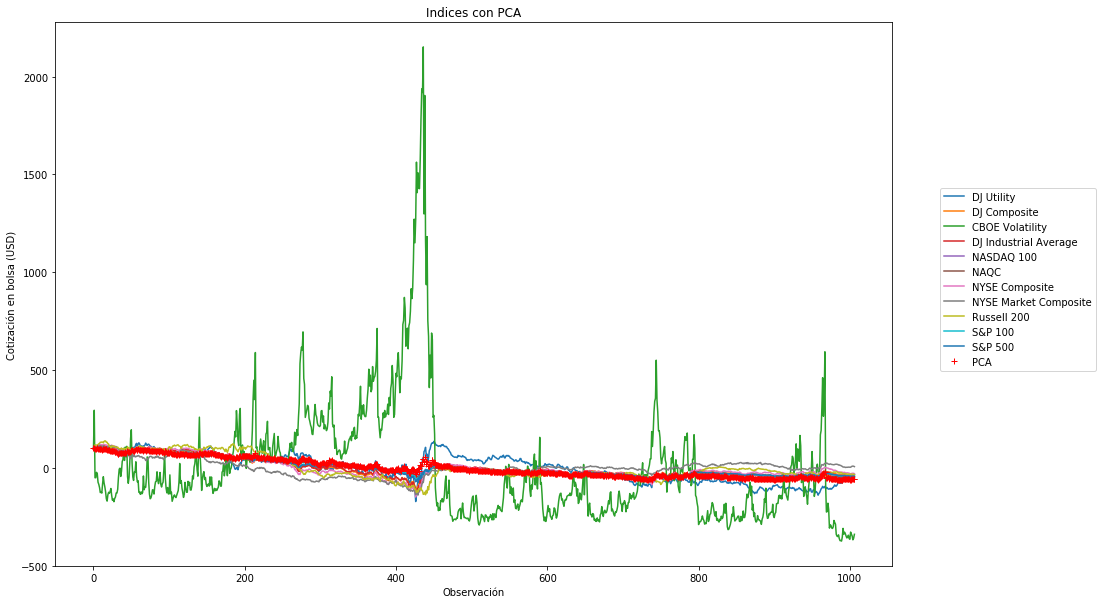

In [37]:
plt.figure(figsize=(15, 10))
graficas_PCA(indices_norm)

Se eliminan variables grandes

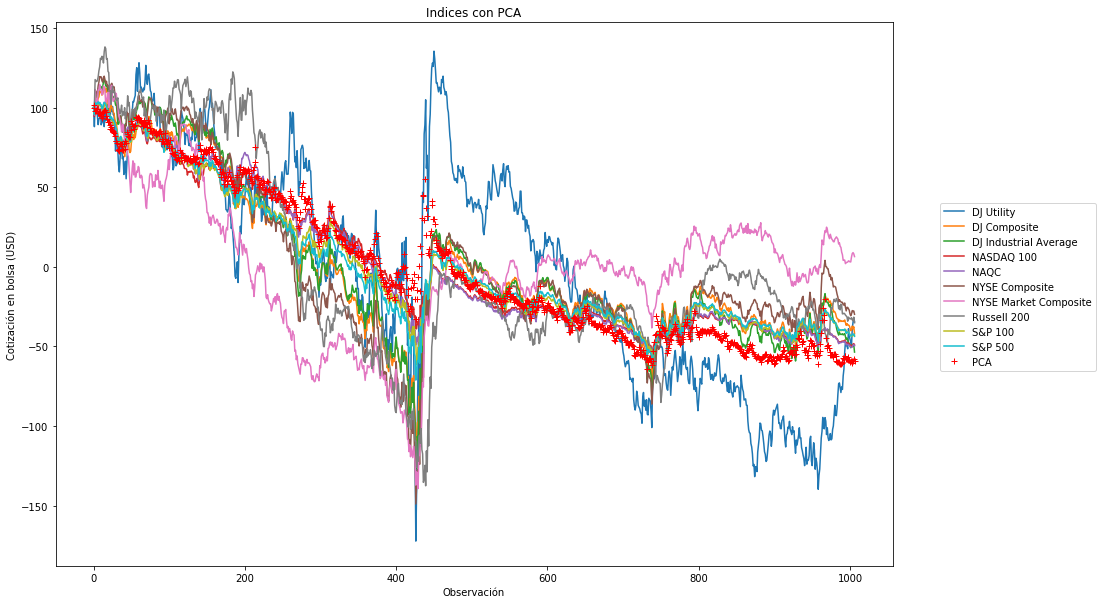

In [38]:
plt.figure(figsize=(15, 10))
indices_norm_2=indices_norm.drop(columns={'CBOE Volatility'})

graficas_PCA(indices_norm_2)

In [35]:
indices_norm_2.columns

Index(['DJ Utility', 'DJ Composite', 'DJ Industrial Average', 'NASDAQ 100',
       'NAQC', 'NYSE Composite', 'NYSE Market Composite', 'Russell 200',
       'S&P 100', 'S&P 500', 'PCA'],
      dtype='object')

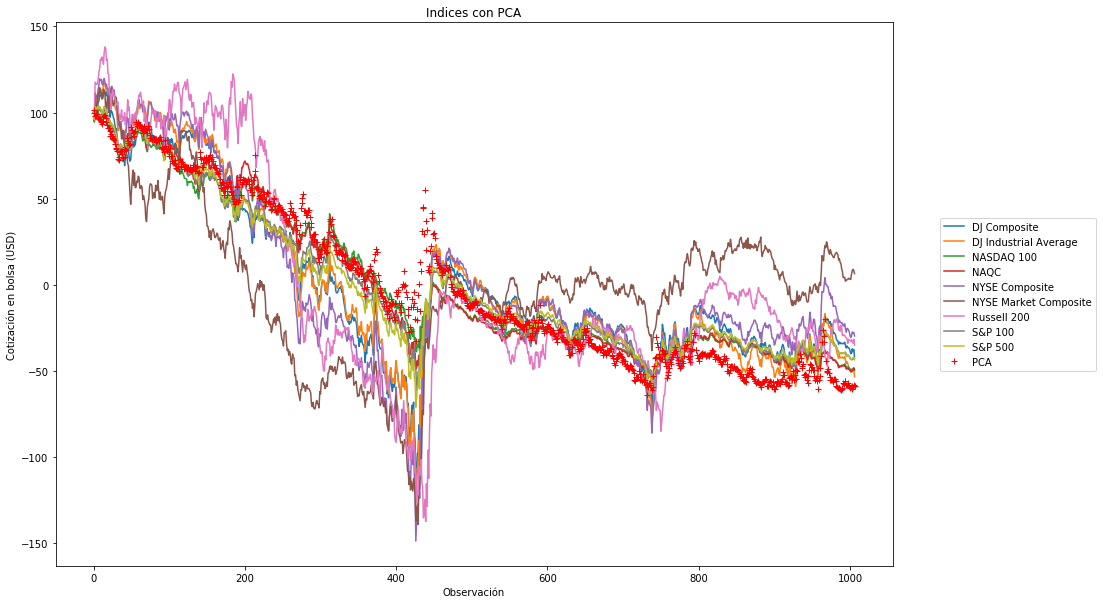

In [39]:
plt.figure(figsize=(15, 10))
indices_norm_2=indices_norm_2.drop(columns={'DJ Utility'})
graficas_PCA(indices_norm_2)